**LASSO MODEL**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [2]:
df = pd.read_csv("C:/Users\monster\Desktop\Regresyon Modelleri\RidgeRegression\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [3]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [5]:
lasso_model.intercept_

-5.587450677336733

In [6]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [14]:
#coefficients for different lambda values
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergen

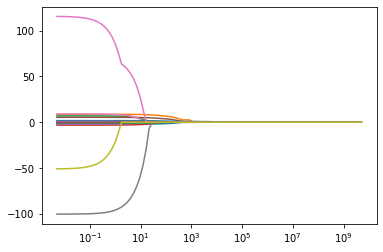

In [15]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")